In [1]:
test_date = "2025-03-23"

In [2]:
import time

# Record start time
start_time = time.time()

# Your program code here
# Example:

In [3]:
import requests
def fetch_ppc_data(input_date):
    """Fetch PPC data from API based on input date and return results as dictionary
    
    Args:
        input_date (str): Date string in format "YYYY-MM-DD"
    
    Returns:
        dict: Dictionary containing status code, response data/error
    """
    url = "http://th2sroeeii2.TH.utacgroup.com/APISAWParameter/api/PPCData/postData"
    payload = {
        "startdate": input_date
    }
    headers = {
        "Content-Type": "application/json"
    }
    
    response = requests.post(url, json=payload, headers=headers)
    
    result = {
        'status_code': response.status_code,
        'data': None,
        'error': None,
        'raw_text': None
    }
    
    try:
        result['data'] = response.json()
    except ValueError:
        result['error'] = "Failed to parse JSON response"
        result['raw_text'] = response.text
    
    return result

#test_date = "2025-03-21"
api_response = fetch_ppc_data(test_date)

print(f"Status Code: {api_response['status_code']}")
if api_response['data']:
    print("✅ Response Data (as JSON):")
    data = api_response['data']
else:
    print(f"⚠️ Error: {api_response['error']}")
    print("Raw Response:")
    print(api_response['raw_text'])

Status Code: 200
✅ Response Data (as JSON):


In [4]:
import pandas as pd
len(data)

238240

In [5]:
print(data[0])

{'EquipOpn': 'WSW', 'EquipID': 'TSWD261', 'ULotID': '', 'Recipe': 'ISL0596P_B_2', 'Parameter': '4280:50800000,4290:50800000,6603:1000,6611:800,6607:1000,6615:800,4628:5588,4629:5588,6641:-700,16009:System.Byte[],16058:System.Byte[],6640:-700,16008:System.Byte[],16057:System.Byte[],6636:-650,16004:System.Byte[],16053:System.Byte[],6637:-700,16005:System.Byte[],16054:System.Byte[],6666:200,16034:System.Byte[],16132:System.Byte[],4204:50000,4205:40000', 'CreateTime': '2025-03-23T23:59:59.917', 'EventID': '8', 'EventDesc': 'Kerf Check End', 'SAW_ProductionStock_Z1': 'SW00000109', 'BladeOD_Z1': '2.1874', 'BladeThickness_Z1': '0.0012', 'FlangeODType_Z1': 'Hub', 'SAW_ProductionStock_Z2': 'SW00000150', 'BladeOD_Z2': '2.1874', 'BladeThickness_Z2': '0.00096', 'FlangeODType_Z2': 'Hub'}


In [6]:
# Direct conversion to DataFrame
df = pd.DataFrame(data)

# Optional: Convert datetime column
df['CreateTime'] = pd.to_datetime(df['CreateTime'],format='ISO8601')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238240 entries, 0 to 238239
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   EquipOpn                238240 non-null  object        
 1   EquipID                 238240 non-null  object        
 2   ULotID                  238240 non-null  object        
 3   Recipe                  238240 non-null  object        
 4   Parameter               238240 non-null  object        
 5   CreateTime              238240 non-null  datetime64[ns]
 6   EventID                 238240 non-null  object        
 7   EventDesc               238240 non-null  object        
 8   SAW_ProductionStock_Z1  238240 non-null  object        
 9   BladeOD_Z1              238240 non-null  object        
 10  BladeThickness_Z1       238240 non-null  object        
 11  FlangeODType_Z1         238240 non-null  object        
 12  SAW_ProductionStock_Z2  238240

In [7]:
df

,EquipOpn,EquipID,ULotID,Recipe,Parameter,CreateTime,EventID,EventDesc,SAW_ProductionStock_Z1,BladeOD_Z1,BladeThickness_Z1,FlangeODType_Z1,SAW_ProductionStock_Z2,BladeOD_Z2,BladeThickness_Z2,FlangeODType_Z2
0,WSW,TSWD261,,ISL0596P_B_2,"4280:50800000,4290:50800000,6603:1000,6611:800...",2025-03-23 23:59:59.917,8,Kerf Check End,SW00000109,2.1874,0.0012,Hub,SW00000150,2.1874,0.00096,Hub
1,WSW,TSWD222,IFSPS1288.1,IFX0029P_S,"1404:987,1405:1974,3223:300,1412:16779,1413:16...",2025-03-23 23:59:58.863,7,Kerf Check Start,SW00000189,2.1874,0.0006,Hub,SW00000190,2.1874,0.0006,Hub
2,WSW,TSWD222,IFSPS1288.1,IFX0029P_S,"4280:25400000,4290:25400000,6603:1200,6611:800...",2025-03-23 23:59:58.820,7,Kerf Check Start,SW00000189,2.1874,0.0006,Hub,SW00000190,2.1874,0.0006,Hub
3,WSW,TSWD172,,ISL0591P_A_2,"1404:2943,1405:1962,3223:298,1412:27468,1413:1...",2025-03-23 23:59:58.663,8,Kerf Check End,SW00000109,2.1874,0.0012,Hub,SW00000150,2.1874,0.00096,Hub
4,WSW,TSWD172,,ISL0591P_A_2,"4280:50800000,4290:50800000,6603:1000,6611:800...",2025-03-23 23:59:58.637,8,Kerf Check End,SW00000109,2.1874,0.0012,Hub,SW00000150,2.1874,0.00096,Hub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238235,WSW,TSWD232,MNGPS0560.1,MNS0016P_E,"4280:25400000,4290:25400000,6603:1200,6611:800...",2025-03-23 00:00:01.320,7,Kerf Check Start,SW00000162,2.1874,0.00138,Hub,SW00000011,2.1874,0.0006,Hub
238236,WSW,TSWD105,,VS00333E_B_1,"1404:1978,1405:989,3223:System.Byte[],1412:286...",2025-03-23 00:00:00.923,8,Kerf Check End,SW00000162,2.1874,0.00138,Hub,SW00000150,2.1874,0.00096,Hub
238237,WSW,TSWD105,,VS00333E_B_1,"4280:38100000,4290:38100000,6603:System.Byte[]...",2025-03-23 00:00:00.910,8,Kerf Check End,SW00000162,2.1874,0.00138,Hub,SW00000150,2.1874,0.00096,Hub
238238,WSW,TSWD187,SI7PS1196.1,SIC0153P_A,"1404:2946,1405:5892,3223:293,1412:22586,1413:2...",2025-03-23 00:00:00.767,7,Kerf Check Start,SW00000213,2.1874,0.001,Hub,SW00000004,2.1874,0.0006,Hub


In [8]:
df.to_excel('D:/ppc_saw/myfolder/' + test_date + '.xlsx')

In [9]:
# Import Data Profile Excel file name 'ProcessParasProfileUTL'
import polars as pl

# Specify the path to your Excel file and the sheet names to import
excel_path = 'PPP.xlsx'
sheet_names = ['ProcessParasProfileUTL']

# Read each specified sheet into a dictionary of DataFrames
dfs2 = {}
for sheet in sheet_names:
    dfs2[sheet] = pl.read_excel(
        excel_path,
        sheet_name=sheet  # Specifies which sheet to read
    )

# Access the DataFrame using the sheet name as the key
df4 = dfs2['ProcessParasProfileUTL']

In [10]:
# Convert the column to string (Utf8)
df4 = df4.with_columns(
    pl.col("ParaKey").cast(pl.Utf8)  # Cast to string
)
df4

EquipOpn,Sno,ParaGroup,ParaName,Unit,ParaKey,Active,EquipModel,SpecRevision,ParaClass
str,i64,str,str,str,str,i64,str,str,str
"""WSW""",21,"""Parameter Description""","""CH1_SPD[x]""","""NA""","""4280""",1,"""DFD6560""","""UTL1IED""","""ECID"""
"""WSW""",22,"""Parameter Description""","""CH2_SPD[x]""","""NA""","""4290""",1,"""DFD6560""","""UTL1IED""","""ECID"""
"""WSW""",23,"""Parameter Description""","""Chipping size Z1""","""nm""","""1404""",1,"""DFD6560""","""UTL1IED""","""SVID"""
"""WSW""",26,"""Parameter Description""","""Chipping size Z2""","""nm""","""1405""",1,"""DFD6560""","""UTL1IED""","""SVID"""
"""WSW""",27,"""Parameter Description""","""CO2 Injector Resitivity""","""kOhmcm""","""3223""",1,"""DFD6560""","""UTL1IED""","""SVID"""
…,…,…,…,…,…,…,…,…,…
"""WSW""",73,"""Parameter Description""","""Spindle rev. Z1 (Set in recipe…","""nm""","""4204""",1,"""DFD6560""","""UTL1IED""","""ECID"""
"""WSW""",73,"""Parameter Description""","""Atomizing nozzle clean air pre…","""nm""","""1785""",1,"""DFD6560""","""UTL1IED""","""SVID"""
"""WSW""",74,"""Parameter Description""","""Spindle rev. Z2 (Set in recipe…","""nm""","""4205""",1,"""DFD6560""","""UTL1IED""","""ECID"""


In [11]:
import polars as pl
import os

# Set the path to your folder containing 'PPCDataUTL' Excel files
folder_path = 'myfolder'

# Initialize a list to collect DataFrames
dfs_list = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):  # Process only .xlsx files
        excel_path = os.path.join(folder_path, filename)
        
        try:
            # Read the Excel file (defaults to first sheet)
            df = pl.read_excel(excel_path)
            dfs_list.append(df)
            
        except Exception as e:
            print(f"Error reading file {filename}: {e}")
            continue

# Combine all DataFrames (handles empty case gracefully)
df3 = pl.concat(dfs_list) if dfs_list else pl.DataFrame()

# Drop columns and sort
if not df3.is_empty():
    df3 = (
        df3
        .drop(['EquipOpn', 'ULotID', 'EventID'])  # Remove columns
        .sort(by=['EquipID', 'CreateTime'])  # Sort
        # .with_row_count("index")  # Optional: Add index column if needed
    )

# print("Data has been read from all files and combined into df3")

In [12]:
import polars as pl

# Define the column names and their corresponding data types
col_ECID = {'EquipID':'object', 'CreateTime':'datetime64[ns]','CreateTimeUnix':'int64','EventDesc':'object','4280':'int64','4290':'int64','6603':'int64','6611':'int64',
            '6607':'int64','6615':'int64','4628':'int64','4629':'int64','6641':'int64','16009':'int64','16058':'int64',
            '6640':'int64','16008':'int64','16057':'int64','6636':'int64','16004':'int64','16053':'int64','6637':'int64',
            '16005':'int64','16054':'int64','6666':'int64','16034':'int64','16132':'int64','4204':'int64','4205':'int64'}

# Map Pandas-style data types to Polars data types
dtype_mapping = {
    'object': pl.Utf8,
    'datetime64[ns]': pl.Datetime,
    'float32': pl.Float32,
    'int64': pl.Int64
}

# Create a schema dictionary with Polars data types
polars_schema = {
    col: dtype_mapping[dtype] 
    for col, dtype in col_ECID.items()
}

# Initialize an empty DataFrame with the specified schema
ECID = pl.DataFrame({
    col: pl.Series(name=col, dtype=dt) 
    for col, dt in polars_schema.items()
})

#print(ECID)

In [13]:
import polars as pl

# Define the column names and their corresponding data types
col_SVID = {'EquipID':'object', 'CreateTime':'datetime64[ns]','CreateTimeUnix':'int64','EventDesc':'object','1404':'int64','1405':'int64','3223':'int64','1412':'int64',
            '1413':'int64','1400':'int64','1401':'int64','1763':'int64','1765':'int64','1352':'int64','1353':'int64',
            '1771':'int64','1775':'int64','1502':'int64','1503':'int64','1760':'int64','1759':'int64','1755':'int64',
            '1756':'int64','1500':'int64','1501':'int64','1785':'int64','1764':'int64','1766':'int64'}

# Map Pandas-style data types to Polars data types
dtype_mapping = {
    'object': pl.Utf8,
    'datetime64[ns]': pl.Datetime,
    'float32': pl.Float32,
    'int64': pl.Int64
}

# Create a schema dictionary with Polars data types
polars_schema = {
    col: dtype_mapping[dtype] 
    for col, dtype in col_SVID.items()
}

# Initialize an empty DataFrame with the specified schema
SVID = pl.DataFrame({
    col: pl.Series(name=col, dtype=dt) 
    for col, dt in polars_schema.items()
})

#print(SVID)

In [14]:
from tqdm import tqdm
import polars as pl

def get_parameter(s):
    pairs = s.split(',')
    parameter = {}
    for pair in pairs:
        key_str, value_str = pair.split(':')
        key = int(key_str)
        if value_str != 'System.Byte[]':
            value = int(value_str)
            parameter[key] = value
    return parameter

# Initialize lists to collect new rows for SVID and ECID
svid_rows = []
ecid_rows = []

# Iterate over each row in df3 with a progress bar
for row in tqdm(df3.iter_rows(named=True), desc="Processing rows"):
    # Extract the parameters string from the 'parameters' column (adjust column name if necessary)
    param_str = row['Parameter']
    # Parse the parameters string into a dictionary
    param_dict = get_parameter(param_str)
    # Add additional columns from the current row
    param_dict.update({
        'EquipID': row['EquipID'],
        'CreateTime': row['CreateTime'],
        'EventDesc': row['EventDesc']
    })
    # Convert all keys to strings
    param_dict = {str(k): v for k, v in param_dict.items()}
    
    # Check for SVID record (key '1404' with value > 0)
    svid_value = param_dict.get('1404', 0)
    if svid_value > 0:
        # Create a row with columns matching SVID's schema, filling missing keys with None
        svid_row = {col: param_dict.get(col, None) for col in SVID.columns}
        svid_rows.append(svid_row)
    
    # Check for ECID record (key '4280' with value > 0)
    ecid_value = param_dict.get('4280', 0)
    if ecid_value > 0:
        # Create a row with columns matching ECID's schema, filling missing keys with None
        ecid_row = {col: param_dict.get(col, None) for col in ECID.columns}
        ecid_rows.append(ecid_row)

# Append collected rows to SVID and ECID DataFrames
#if svid_rows:
    #SVID = pl.concat([SVID, pl.DataFrame(svid_rows)])
#if ecid_rows:
    #ECID = pl.concat([ECID, pl.DataFrame(ecid_rows)])

Processing rows: 1031078it [00:45, 22750.69it/s]


In [15]:
import pandas as pd
SVID = pd.DataFrame(svid_rows)
SVID['CreateTimeUnix'] = SVID['CreateTime'].astype('int64') // 10**9
SVID.sort_values(by=['EquipID', 'CreateTime'])
#SVID_polars = pl.from_pandas(SVID)
SVID = pl.from_pandas(SVID)

ECID = pd.DataFrame(ecid_rows)
ECID['CreateTimeUnix'] = ECID['CreateTime'].astype('int64') // 10**9
ECID.sort_values(by=['EquipID', 'CreateTime'])
#ECID_polars = pl.from_pandas(ECID)
ECID = pl.from_pandas(ECID)

df3 = df3.with_columns(
    pl.col("CreateTime").dt.epoch('s').alias("CreateTimeUnix")
)

In [16]:
# Memory release 
svid_rows = []
ecid_rows = []

In [17]:
SVID

EquipID,CreateTime,CreateTimeUnix,EventDesc,1404,1405,3223,1412,1413,1400,1401,1763,1765,1352,1353,1771,1775,1502,1503,1760,1759,1755,1756,1500,1501,1785,1764,1766
str,datetime[ns],i64,str,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""TSWD036""",2025-03-20 00:00:02.230,1742428802,"""Kerf Check End""",12818,3944,null,59160,37468,-1479,1479,1130,1080,370078,323596,0,0,1150,1080,137,205,136,205,54940,50000,217,54980,49960
"""TSWD036""",2025-03-20 00:00:55.423,1742428855,"""Kerf Check Start""",12818,3944,null,59160,37468,-1479,1479,1130,1060,370078,323596,0,0,1130,1060,137,205,137,204,54980,49960,217,54940,49960
"""TSWD036""",2025-03-20 00:01:02.050,1742428862,"""Kerf Check End""",12818,4930,null,59160,37468,-1479,-493,1150,1060,370078,323596,0,0,1150,1060,138,205,136,205,54980,49960,216,54980,49960
"""TSWD036""",2025-03-20 00:01:58.957,1742428918,"""Kerf Check Start""",12818,4930,null,59160,37468,-1479,-493,1150,1080,370078,323596,0,0,1130,1060,134,205,136,204,54940,49960,216,54940,49960
"""TSWD036""",2025-03-20 00:02:12.273,1742428932,"""Kerf Check End""",7888,3944,null,59160,36482,-1479,-986,1150,1060,370078,323596,0,0,1150,1060,134,205,136,206,54940,49960,217,54940,49960
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TSWD299""",2025-03-23 23:56:18.800,1742774178,"""Kerf Check End""",7856,1964,303.0,37316,24550,491,0,1250,1230,216662,287782,650,0,800,820,134,205,130,206,49950,49950,202,49900,49900
"""TSWD299""",2025-03-23 23:57:26.930,1742774246,"""Kerf Check Start""",7856,1964,314.0,37316,24550,491,0,820,810,216662,287782,0,0,800,820,134,205,130,206,50000,49950,202,50000,49950
"""TSWD299""",2025-03-23 23:57:43.190,1742774263,"""Kerf Check End""",3928,3928,305.0,36334,25532,-982,491,1210,1250,216662,287782,0,850,800,820,134,205,130,206,49900,49950,202,49950,49900


In [18]:
ECID

EquipID,CreateTime,CreateTimeUnix,EventDesc,4280,4290,6603,6611,6607,6615,4628,4629,6641,16009,16058,6640,16008,16057,6636,16004,16053,6637,16005,16054,6666,16034,16132,4204,4205
str,datetime[ns],i64,str,i64,i64,f64,f64,f64,f64,i64,i64,f64,str,str,f64,str,str,f64,str,str,f64,str,str,f64,str,str,i64,i64
"""TSWD036""",2025-03-20 00:00:02.210,1742428802,"""Kerf Check End""",20320000,20320000,null,null,null,null,5080,5080,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,55000,50000
"""TSWD036""",2025-03-20 00:00:55.397,1742428855,"""Kerf Check Start""",20320000,20320000,null,null,null,null,5080,5080,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,55000,50000
"""TSWD036""",2025-03-20 00:01:02.043,1742428862,"""Kerf Check End""",20320000,20320000,null,null,null,null,5080,5080,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,55000,50000
"""TSWD036""",2025-03-20 00:01:58.923,1742428918,"""Kerf Check Start""",20320000,20320000,null,null,null,null,5080,5080,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,55000,50000
"""TSWD036""",2025-03-20 00:02:12.257,1742428932,"""Kerf Check End""",20320000,20320000,null,null,null,null,5080,5080,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,55000,50000
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TSWD299""",2025-03-23 23:56:18.583,1742774178,"""Kerf Check End""",50800000,50800000,1000.0,500.0,1000.0,500.0,3048,3048,-700.0,null,null,-700.0,null,null,-650.0,null,null,-700.0,null,null,200.0,null,null,50000,50000
"""TSWD299""",2025-03-23 23:57:26.740,1742774246,"""Kerf Check Start""",50800000,50800000,1000.0,500.0,1000.0,500.0,3048,3048,-700.0,null,null,-700.0,null,null,-650.0,null,null,-700.0,null,null,200.0,null,null,50000,50000
"""TSWD299""",2025-03-23 23:57:43.007,1742774263,"""Kerf Check End""",50800000,50800000,1000.0,500.0,1000.0,500.0,3048,3048,-700.0,null,null,-700.0,null,null,-650.0,null,null,-700.0,null,null,200.0,null,null,50000,50000


In [19]:
df3

__UNNAMED__0,EquipID,Recipe,Parameter,CreateTime,EventDesc,SAW_ProductionStock_Z1,BladeOD_Z1,BladeThickness_Z1,FlangeODType_Z1,SAW_ProductionStock_Z2,BladeOD_Z2,BladeThickness_Z2,FlangeODType_Z2,CreateTimeUnix
i64,str,str,str,datetime[ms],str,str,str,str,str,str,str,str,str,i64
271412,"""TSWD036""","""STM0533P_J_1""","""4280:20320000,4290:20320000,66…",2025-03-20 00:00:02.210,"""Kerf Check End""","""SW00000144""","""2.1874""","""0.0019""","""Hub""","""SW00000146""","""2.1874""","""0.0014""","""Hub""",1742428802
271411,"""TSWD036""","""STM0533P_J_1""","""1404:12818,1405:3944,3223:Syst…",2025-03-20 00:00:02.230,"""Kerf Check End""","""SW00000144""","""2.1874""","""0.0019""","""Hub""","""SW00000146""","""2.1874""","""0.0014""","""Hub""",1742428802
271225,"""TSWD036""","""STM0533P_J_1""","""4280:20320000,4290:20320000,66…",2025-03-20 00:00:55.397,"""Kerf Check Start""","""SW00000144""","""2.1874""","""0.0019""","""Hub""","""SW00000146""","""2.1874""","""0.0014""","""Hub""",1742428855
271224,"""TSWD036""","""STM0533P_J_1""","""1404:12818,1405:3944,3223:Syst…",2025-03-20 00:00:55.423,"""Kerf Check Start""","""SW00000144""","""2.1874""","""0.0019""","""Hub""","""SW00000146""","""2.1874""","""0.0014""","""Hub""",1742428855
271207,"""TSWD036""","""STM0533P_J_1""","""4280:20320000,4290:20320000,66…",2025-03-20 00:01:02.043,"""Kerf Check End""","""SW00000144""","""2.1874""","""0.0019""","""Hub""","""SW00000146""","""2.1874""","""0.0014""","""Hub""",1742428862
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
437,"""TSWD299""","""ISL0591P_A_3""","""1404:3928,1405:3928,3223:305,1…",2025-03-23 23:57:43.190,"""Kerf Check End""","""SW00000156""","""2.1874""","""0.0014""","""Hub""","""SW00000159""","""2.1874""","""0.035""","""Hub""",1742774263
143,"""TSWD299""","""ISL0591P_A_3""","""4280:50800000,4290:50800000,66…",2025-03-23 23:59:25.003,"""Kerf Check Start""","""SW00000156""","""2.1874""","""0.0014""","""Hub""","""SW00000159""","""2.1874""","""0.035""","""Hub""",1742774365
141,"""TSWD299""","""ISL0591P_A_3""","""1404:3928,1405:3928,3223:294,1…",2025-03-23 23:59:25.227,"""Kerf Check Start""","""SW00000156""","""2.1874""","""0.0014""","""Hub""","""SW00000159""","""2.1874""","""0.035""","""Hub""",1742774365


In [20]:
import duckdb
# Configure DuckDB to work in memory-constrained environments
duckdb.execute("SET temp_directory='C:/Users/RYZEN/datamining/saw/temp';")  # Use SSD if possible

# Query directly on the DataFrame (no need to load into a database)
result = duckdb.sql("""
    SELECT df3.EquipID, Recipe, df3.CreateTime, df3.CreateTimeUnix, df3.EventDesc,
    SAW_ProductionStock_Z1, BladeOD_Z1, BladeThickness_Z1, FlangeODType_Z1,
    SAW_ProductionStock_Z2, BladeOD_Z2, BladeThickness_Z2, FlangeODType_Z2,
    ECID."4280" AS ECID_4280, 
    ECID."4290" AS ECID_4290, 
    ECID."6603" AS ECID_6603, 
    ECID."6611" AS ECID_6611,
    ECID."6607" AS ECID_6607, 
    ECID."6615" AS ECID_6615, 
    ECID."4628" AS ECID_4628,
    ECID."4629" AS ECID_4629,
    ECID."6641" AS ECID_6641,
    ECID."16009" AS ECID_16009,
    ECID."16058" AS ECID_16058,
    ECID."6640" AS ECID_6640,
    ECID."16008" AS ECID_16008,
    ECID."16057" AS ECID_16057,
    ECID."6636" AS ECID_6636,
    ECID."16004" AS ECID_16004,
    ECID."16053" AS ECID_16053,
    ECID."6637" AS ECID_6637,
    ECID."16005" AS ECID_16005,
    ECID."16054" AS ECID_16054,
    ECID."6666" AS ECID_6666,
    ECID."16034" AS ECID_16034,
    ECID."16132" AS ECID_16132,
    ECID."4204" AS ECID_4204,
    ECID."4205" AS ECID_4205,
    SVID."1404" AS SVID_1404,
    SVID."1405" AS SVID_1405,
    SVID."3223" AS SVID_3223,
    SVID."1412" AS SVID_1412,
    SVID."1413" AS SVID_1413,
    SVID."1400" AS SVID_1400,
    SVID."1401" AS SVID_1401,
    SVID."1763" AS SVID_1763,
    SVID."1765" AS SVID_1765,
    SVID."1352" AS SVID_1352,
    SVID."1353" AS SVID_1353,
    SVID."1771" AS SVID_1771,
    SVID."1775" AS SVID_1775,
    SVID."1502" AS SVID_1502,
    SVID."1503" AS SVID_1503,
    SVID."1760" AS SVID_1760,
    SVID."1759" AS SVID_1759,
    SVID."1755" AS SVID_1755,
    SVID."1756" AS SVID_1756,
    SVID."1500" AS SVID_1500,
    SVID."1501" AS SVID_1501,
    SVID."1785" AS SVID_1785,
    SVID."1764" AS SVID_1764,
    SVID."1766" AS SVID_1766
    FROM df3, SVID, ECID
    WHERE df3.EquipID = SVID.EquipID AND df3.EquipID = ECID.EquipID 
    AND df3.CreateTimeUnix = SVID.CreateTimeUnix AND df3.CreateTimeUnix = ECID.CreateTimeUnix AND df3.Parameter LIKE '4280%'
    ORDER BY df3.EquipID, df3.CreateTime ASC
""").to_df()
result

,EquipID,Recipe,CreateTime,CreateTimeUnix,EventDesc,SAW_ProductionStock_Z1,BladeOD_Z1,BladeThickness_Z1,FlangeODType_Z1,SAW_ProductionStock_Z2,...,SVID_1503,SVID_1760,SVID_1759,SVID_1755,SVID_1756,SVID_1500,SVID_1501,SVID_1785,SVID_1764,SVID_1766
0,TSWD036,STM0533P_J_1,2025-03-20 00:00:02.210,1742428802,Kerf Check End,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1080,137,205,136,205,54940,50000,217,54980,49960
1,TSWD036,STM0533P_J_1,2025-03-20 00:00:55.397,1742428855,Kerf Check Start,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1060,137,205,137,204,54980,49960,217,54940,49960
2,TSWD036,STM0533P_J_1,2025-03-20 00:01:02.043,1742428862,Kerf Check End,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1060,138,205,136,205,54980,49960,216,54980,49960
3,TSWD036,STM0533P_J_1,2025-03-20 00:01:58.923,1742428918,Kerf Check Start,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1060,134,205,136,204,54940,49960,216,54940,49960
4,TSWD036,STM0533P_J_1,2025-03-20 00:02:12.257,1742428932,Kerf Check End,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1060,134,205,136,206,54940,49960,217,54940,49960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456879,TSWD299,ISL0591P_A_3,2025-03-23 23:56:18.583,1742774178,Kerf Check End,SW00000156,2.1874,0.0014,Hub,SW00000159,...,820,134,205,130,206,49950,49950,202,49900,49900
456880,TSWD299,ISL0591P_A_3,2025-03-23 23:57:26.740,1742774246,Kerf Check Start,SW00000156,2.1874,0.0014,Hub,SW00000159,...,820,134,205,130,206,50000,49950,202,50000,49950
456881,TSWD299,ISL0591P_A_3,2025-03-23 23:57:43.007,1742774263,Kerf Check End,SW00000156,2.1874,0.0014,Hub,SW00000159,...,820,134,205,130,206,49900,49950,202,49950,49900
456882,TSWD299,ISL0591P_A_3,2025-03-23 23:59:25.003,1742774365,Kerf Check Start,SW00000156,2.1874,0.0014,Hub,SW00000159,...,820,134,205,130,206,49950,50000,202,49950,50000


In [21]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456884 entries, 0 to 456883
Data columns (total 62 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   EquipID                 456884 non-null  object        
 1   Recipe                  456884 non-null  object        
 2   CreateTime              456884 non-null  datetime64[ms]
 3   CreateTimeUnix          456884 non-null  int64         
 4   EventDesc               456884 non-null  object        
 5   SAW_ProductionStock_Z1  450658 non-null  object        
 6   BladeOD_Z1              450658 non-null  object        
 7   BladeThickness_Z1       450658 non-null  object        
 8   FlangeODType_Z1         450658 non-null  object        
 9   SAW_ProductionStock_Z2  450658 non-null  object        
 10  BladeOD_Z2              450658 non-null  object        
 11  BladeThickness_Z2       450658 non-null  object        
 12  FlangeODType_Z2         450658

In [22]:
# Memory release 
df3 = []
SVID = []
ECID = []

In [23]:
# Anomaly Detection with Isolation Forest Code
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load your dataframe here
# result = pd.read_csv(...)

# Initial cleaning
df = result.dropna(axis=1, how='all')          # Drop completely empty columns
df = df.dropna(axis=0, how='any')              # Drop rows with any missing values
df = df.drop(['CreateTime', 'CreateTimeUnix'], axis=1)  # Remove time columns

# Free Memory
result = []

# Preserve original categorical values before encoding
original_cat_columns = df.select_dtypes(include='object').copy()
encoded_df = df.copy()

# Label encode categorical columns
cat_cols = original_cat_columns.columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    label_encoders[col] = le

# Train Isolation Forest and get scores
model = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)
model.fit(encoded_df)

# Get anomaly scores and normalize them to 0-1 range
scores = model.decision_function(encoded_df)
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(scores.reshape(-1, 1))

# Create results dataframe with original values and scores
encoded_df['AnomalyScore'] = scores  # Original scores (-0.5 to 0.5)
encoded_df['AnomalyScore_normalized'] = normalized_scores  # 0-1 scaled

results_df = pd.concat([
    encoded_df[['AnomalyScore', 'AnomalyScore_normalized']],
    original_cat_columns,
    df.select_dtypes(exclude='object')
], axis=1)

# Sort by anomaly score for better inspection
results_df = results_df.sort_values('AnomalyScore_normalized', ascending=False)

# Extract anomalies with original values
anomalies_df = results_df[results_df['AnomalyScore_normalized'] > 0.5]  # Adjust threshold as needed
print(f"Found {len(anomalies_df)} anomalies from {len(df)} total records")
print("\nTop 5 anomalies:")
print(anomalies_df.head())

# Verification metrics
print("\nScore Statistics:")
print(f"Mean score: {results_df.AnomalyScore_normalized.mean():.2f}")
print(f"Max score: {results_df.AnomalyScore_normalized.max():.2f}")
print(f"Min score: {results_df.AnomalyScore_normalized.min():.2f}")

Found 362444 anomalies from 385861 total records

Top 5 anomalies:
        AnomalyScore  AnomalyScore_normalized  EquipID      Recipe  \
134392      0.153073                 1.000000  TSWD160  NXP0430P_C   
134365      0.152894                 0.999388  TSWD160  NXP0430P_C   
131748      0.152555                 0.998227  TSWD160  ONS1981P_A   
252895      0.152541                 0.998181  TSWD206  MC30008P_A   
131718      0.152509                 0.998071  TSWD160  ONS1981P_A   

             EventDesc SAW_ProductionStock_Z1 BladeOD_Z1 BladeThickness_Z1  \
134392  Kerf Check End             SW00000057     2.1874             0.001   
134365  Kerf Check End             SW00000057     2.1874             0.001   
131748  Kerf Check End             SW00000057     2.1874             0.001   
252895  Kerf Check End             SW00000025     2.1874            0.0012   
131718  Kerf Check End             SW00000057     2.1874             0.001   

       FlangeODType_Z1 SAW_ProductionStock_

In [24]:
# Free Memory
results_df = []

In [25]:
anomalies_df.info()
anomalies_df.to_csv('anomaly_output.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 362444 entries, 134392 to 127043
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AnomalyScore             362444 non-null  float64
 1   AnomalyScore_normalized  362444 non-null  float64
 2   EquipID                  362444 non-null  object 
 3   Recipe                   362444 non-null  object 
 4   EventDesc                362444 non-null  object 
 5   SAW_ProductionStock_Z1   362444 non-null  object 
 6   BladeOD_Z1               362444 non-null  object 
 7   BladeThickness_Z1        362444 non-null  object 
 8   FlangeODType_Z1          362444 non-null  object 
 9   SAW_ProductionStock_Z2   362444 non-null  object 
 10  BladeOD_Z2               362444 non-null  object 
 11  BladeThickness_Z2        362444 non-null  object 
 12  FlangeODType_Z2          362444 non-null  object 
 13  ECID_4280                362444 non-null  int64  
 14  ECID

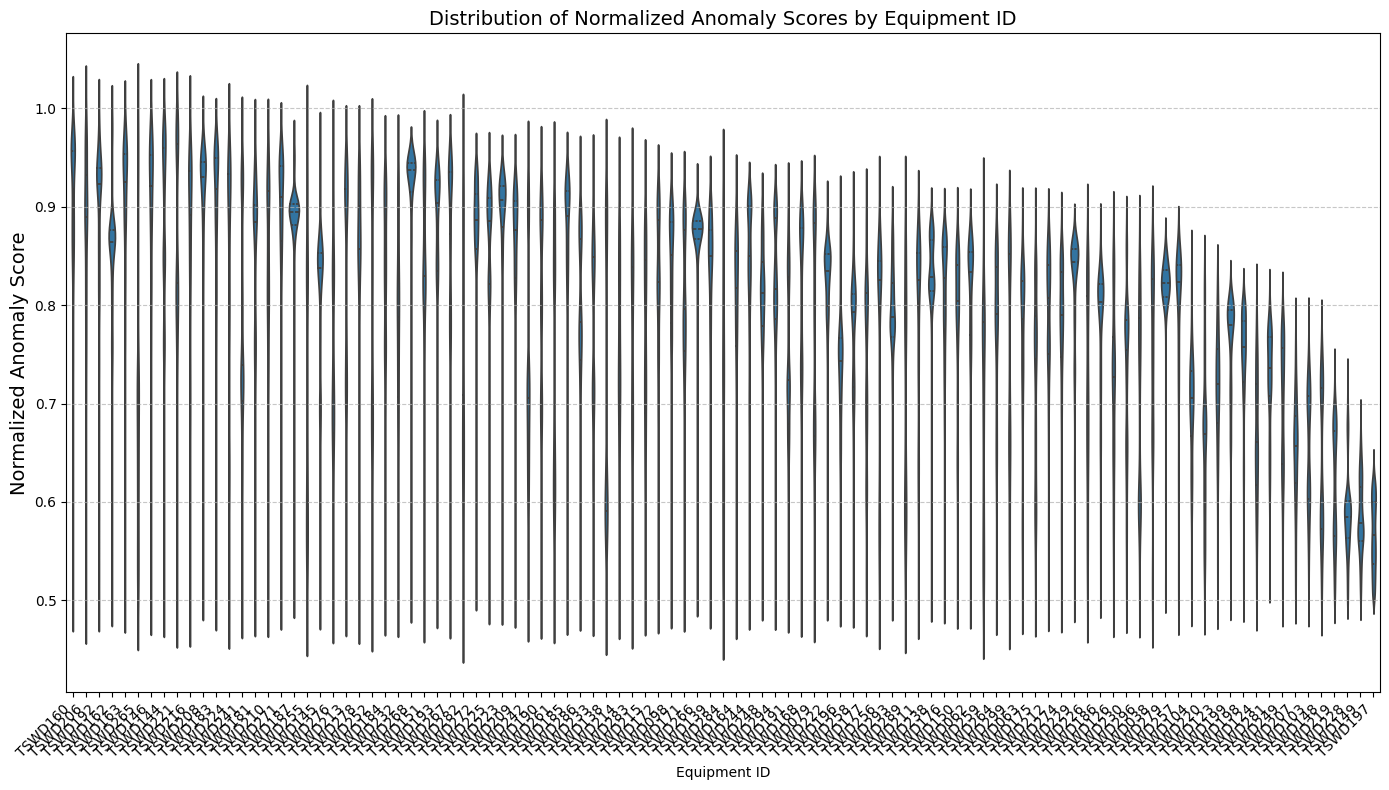

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
plt.figure(figsize=(14, 8))

# Create violin plot (shows distribution density)
sns.violinplot(
    x='EquipID',
    y='AnomalyScore_normalized',
    data=anomalies_df,
    inner='quartile'  # Adds quartile lines inside the violin
)

# Improve readability
plt.title('Distribution of Normalized Anomaly Scores by Equipment ID', fontsize=14)
plt.xlabel('Equipment ID', fontsize=10)
plt.ylabel('Normalized Anomaly Score', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

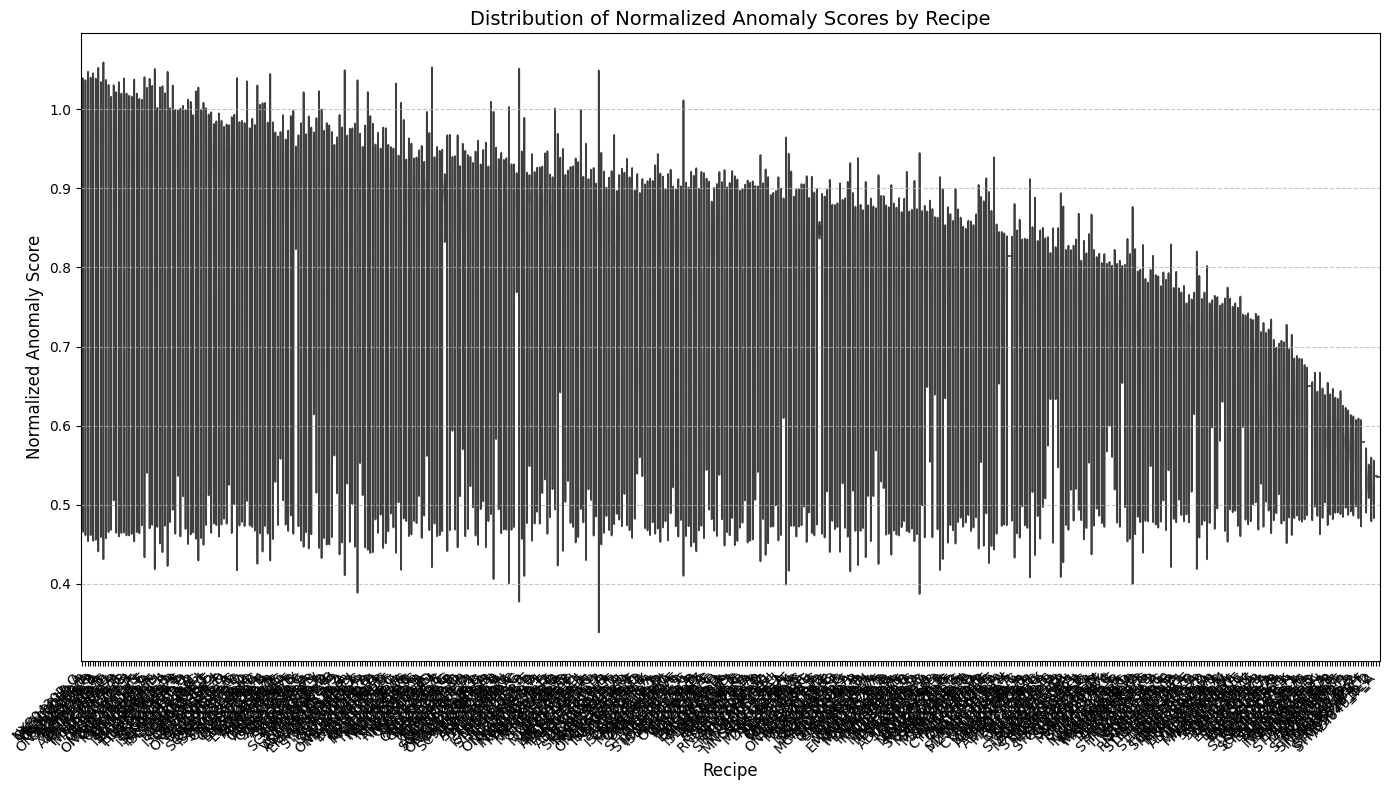

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
plt.figure(figsize=(14, 8))

# Create violin plot (shows distribution density)
sns.violinplot(
    x='Recipe',
    y='AnomalyScore_normalized',
    data=anomalies_df,
    inner='quartile'  # Adds quartile lines inside the violin
)

# Improve readability
plt.title('Distribution of Normalized Anomaly Scores by Recipe', fontsize=14)
plt.xlabel('Recipe', fontsize=12)
plt.ylabel('Normalized Anomaly Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [28]:
# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Processing time: {elapsed_time:.6f} seconds")

Processing time: 355.465299 seconds
